<a href="https://colab.research.google.com/github/kishiyamat/la-kentei-yaminabe/blob/fix%2Fharipota-notebook/notebooks/time_flies-original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time flies...

In [3]:
! pip install svgling  # for depicting syntax tree in nltk module
import nltk
def padding_leaves(tree: nltk.Tree, padding_str: str):
    """
    tree: 葉ノードをパディングしたい木
    padding_str: この入力で葉をパディングする
    """
    for idx, leaves in enumerate(tree.leaves()):
        tree_location = tree.leaf_treeposition(idx)
        leaves_len = int(len(leaves)/2)
        tree[tree_location] =  padding_str*leaves_len + leaves + padding_str*leaves_len
    return tree

## NLTKを用いた方法

In [4]:
grammar = nltk.CFG.fromstring("\n".join([
    # 品詞や句の定義
    "文 -> 名詞句 動詞句",
    "動詞句 -> 動詞 | 動詞 名詞句 | 動詞 前置詞句",
    "名詞句 -> 名詞 | 名詞 名詞 | 冠詞 名詞",
    "前置詞句 -> 前置詞 名詞句",
    # 品詞→単語
    "名詞 -> 'time' | 'fruit' | 'flies' | 'arrow' | 'banana'",
    "冠詞 -> 'a' | 'an'",
    "動詞 -> 'flies' | 'like'",
    "前置詞 -> 'like'",
    ]))
sent_time_flies = "time flies like an arrow".split()
sent_fruit_flies = "fruit flies like a banana".split()
parser = nltk.parse.BottomUpChartParser(grammar)

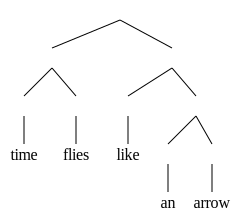

In [5]:
trees_time_flies = list(parser.parse(sent_time_flies))
trees_time_flies[0]

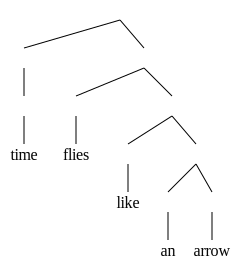

In [6]:
trees_time_flies[1]

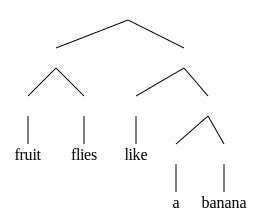

In [7]:
trees_fruit_flies = list(parser.parse(sent_fruit_flies))
trees_fruit_flies[0]

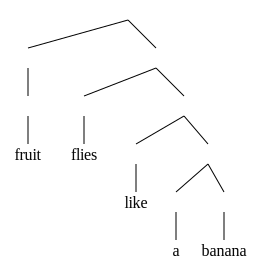

In [8]:
trees_fruit_flies[1]

## Stanza

In [9]:
# pip install stanza==1.6.1 としていたが古くなったのでバージョンの指定を外す
! pip install stanza

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| constituency | ptb3-revised_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: constituency
INFO:stanza:Done loading processors!


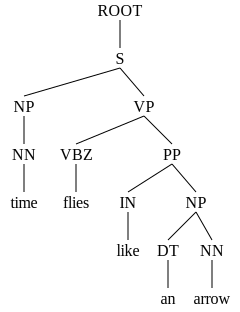

In [10]:
import stanza
from nltk.tree import Tree

nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency', weights_only=True)
doc = nlp(" ".join(sent_time_flies))
tree_str = str(doc.sentences[0].constituency)
Tree.fromstring(tree_str)

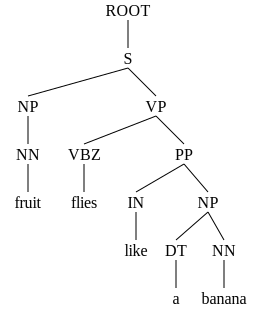

In [11]:
doc = nlp(" ".join(sent_fruit_flies))
tree_str = str(doc.sentences[0].constituency)
Tree.fromstring(tree_str)

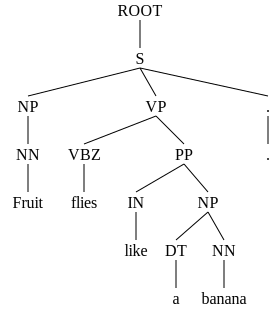

In [12]:
doc = nlp("Fruit flies like a banana.")
tree_str = str(doc.sentences[0].constituency)
Tree.fromstring(tree_str)